In [2]:
from functools import partial
from multiprocessing import Pool
from helper import *
from combination_algorithm import *
from sat_sol import *
# from solver import get_unsolved

In [130]:
def get_unsolved(sol_file, hard_file):
    nums = []
    with open(sol_file, "r") as f:
        lines = f.readlines()
        for line in lines:
            if "#" in line:
                # Get 48 from - 100 99#GRAPH NUMBER 48 WITH 99 EDGES
                num = int(line.split("#")[1].split()[2])
                print(num)
                nums.append(num)
    # get first line of hard file
    with open(hard_file, "r") as f:
        first_line = int(f.readline())

    # Get missing numbers from nums
    missing = [i for i in range(125) if i not in nums]

    hard = list(read_hard_file(hard_file))
    # unsolved = [hard[i] for i in range(0, 100)]
    print("here")
    unsolved = [(i, hard[i]) for i in missing]
    return unsolved

In [9]:
for i, graph in unsolved:
    # print(len(graph.nodes()), len(graph.edges()))
    for j, g in enumerate(networkx_graphs):
        if all([graph.has_edge(*e) for e in g.edges()]):
            print(i, j)
            write_graph_to_file(
                g,
                f"GRAPH NUMBER {i} WITH {len(graph.edges())} EDGES",
                f"all_hard3.out",
            )

59 0
81 1
110 4
111 3
119 2


In [129]:
with open("all_hard3.out", "r") as f:
    graphs = []
    k = int(f.readline())
    for _ in range(k):
        line = f.readline()
        n, m = [int(x) for x in line.split("#")[0].split()]
        # Extract 0 from 100 99#GRAPH NUMBER 0 WITH 282 EDGES
        line_num = int(line.split("#")[1].split()[2])
        # print(line, n, m, line_num)
        edges = []
        for j in range(m):
            edges.append(tuple([int(x) for x in f.readline().split()]))
        graphs.append((line_num, nx.Graph(edges)))

    # sort by line number
    graphs = sorted(graphs, key=lambda x: x[0])

    # Remove duplicates (by line number)
    final_graphs = []
    included = set()
    for g in graphs:
        if g[0] in included:
            print(g[0])
        else:
            final_graphs.append(g[1])
            # included.add(g[0])


    # remove line number
    # graphs = [g[1] for g in graphs]
    print(len(final_graphs))
    for graph in final_graphs:
        write_graph_to_file(
            graph, filename="new.out"
        )
        


123


In [30]:
def read_hard_file(filename):
    with open(filename, "r") as f:
        # Read the number of graphs
        # num_graphs = 1
        num_graphs = int(f.readline())

        for i in range(num_graphs):
            # print(i)
            # # Read the number of vertices and edges

            # if i == 45:
            #     print(l)
            l = f.readline()
            if not l.strip():
                break
            n, m = map(int, l.split())

            # print(n, m)
            # Create a new graph
            G = nx.Graph()

            # Add all the vertices to the graph
            G.add_nodes_from(range(n))

            # m = int(f.readline().strip())
            # G = nx.Graph()
            # # Read and add all the edges to the graph
            for j in range(m):
                u, v = map(int, f.readline().split())
                G.add_edge(u, v)

            yield G

hard_out = read_hard_file("hard_final.out")
hard_in = read_hard_file("all_hard3.in")

hard_in, hard_out = list(hard_in), list(hard_out)

from networkx.algorithms.isomorphism import GraphMatcher

for i, (g_in, g_out) in enumerate(zip(hard_in, hard_out)):
    # print(i, len(g_in.edges()), len(g_out.edges()))
    basic = get_basic_solve(g_in)
    
    print(g_in, g_out)
    if not len(g_out.nodes()) == len(g_in.nodes()):
        print("ERROR HERE ON GRAPH", i)
        visualize_graph(g_in)
        visualize_graph(g_out)
        print(g_out.edges(), g_out.nodes())
        print(g_in.edges(), g_in.nodes())
    if not nx.is_connected(g_out):
        print("ERROR2 HERE ON GRAPH", i)
    if not nx.is_tree(g_out):
        print("ERROR3 HERE ON GRAPH", i)
    if not GraphMatcher(g_in, g_out).subgraph_is_isomorphic():
        print("ERROR4 HERE ON GRAPH", i)

    # if not GraphMatcher.subgraph_is_isomorphic(g_in, g_out):
    #     print("ERROR4 HERE ON GRAPH", i)


Graph with 100 nodes and 282 edges Graph with 100 nodes and 99 edges


KeyboardInterrupt: 

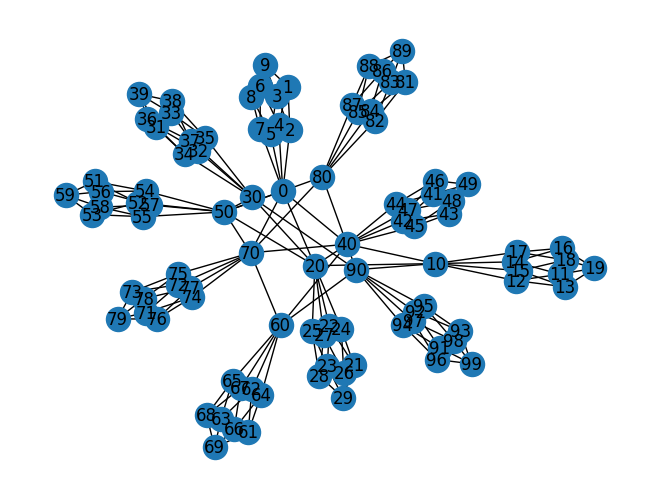

In [53]:
hard_in = list(read_hard_file("all_hard3.in"))
visualize_graph(hard_in[84])
g = hard_in[84]
# sat_solve(hard_in[84])
# solve_component_graph(hard_in[84])

In [60]:
inner=[0, 4, 5, 6, 10, 14, 15, 16, 20, 24, 25, 26, 30, 34, 35, 36, 40, 44, 45, 46, 50, 54, 55, 56, 60, 64, 65, 66, 70, 74, 75, 76, 80, 84, 85, 86, 90, 94, 95, 96]
x = get_sol_from_inner_vertices(g, list(set(inner)))
write_graph_to_file(x, filename="THISFILE.out")

In [23]:
def read_hard_file(filename):
    with open(filename, "r") as f:
        # Read the number of graphs
        # num_graphs = 1
        num_graphs = int(f.readline())

        for i in range(num_graphs):
            # # Read the number of vertices and edges

            # if i == 45:
            #     print(l)
            l = f.readline()
            if not l.strip():
                break
            # reomve everything after #
            l = l.split("#")[0]
            n, m = map(int, l.split())

            # print(n, m)
            # Create a new graph
            G = nx.Graph()

            # Add all the vertices to the graph
            G.add_nodes_from(range(n))

            # m = int(f.readline().strip())
            # G = nx.Graph()
            # # Read and add all the edges to the graph
            for j in range(m):
                u, v = map(int, f.readline().split())
                G.add_edge(u, v)

            yield G

l = list(read_hard_file("all_hard3.in"))
print(len(l))
l2 = list(read_hard_file("all_hard3.out"))
l2 = list(read_hard_file("hard_final.out"))
print(len(l)), print(len(l2))


123
123
123


(None, None)

In [37]:
out_lst = []
with open("hard_final.out", "r") as f:
    # Read the number of graphs
    # num_graphs = 1
    num_graphs = int(f.readline())

    for i in range(num_graphs):
        # # Read the number of vertices and edges

        l = f.readline()

        n, m = map(int, l.split())

        # print(n, m)
        # Create a new graph
        G = nx.Graph()

        # Add all the vertices to the graph
        for j in range(n):
            G.add_node(j)
        for j in range(m):
            u, v = map(int, f.readline().split())
            G.add_edge(u, v)

        out_lst.append(G)
        # visualize_graph(G)
        # print(nx.is_tree(G))
ing_lst = []
with open("all_hard.in", "r") as f:
    num_graphs = int(f.readline())
    for i in range(num_graphs):
        l = f.readline()

        n, m = map(int, l.split())

        # print(n, m)
        # Create a new graph
        G = nx.Graph()

        # Add all the vertices to the graph
        for j in range(n):
            G.add_node(j)
        for j in range(m):
            u, v = map(int, f.readline().split())
            G.add_edge(u, v)

        ing_lst.append(G)

ERROR HERE ON GRAPH 25
[(0, 28), (1, 7), (2, 46), (3, 11), (4, 5), (5, 58), (5, 60), (5, 18), (5, 42), (5, 78), (5, 83), (5, 97), (6, 25), (7, 60), (7, 16), (7, 43), (7, 64), (7, 66), (7, 75), (7, 85), (7, 87), (7, 88), (7, 98), (8, 44), (9, 90), (9, 21), (9, 59), (9, 71), (10, 25), (11, 46), (11, 55), (11, 86), (11, 33), (11, 40), (11, 94), (12, 35), (13, 53), (13, 99), (13, 14), (13, 41), (13, 63), (15, 44), (17, 46), (19, 56), (20, 58), (22, 93), (23, 60), (24, 28), (25, 99), (25, 54), (26, 86), (27, 39), (28, 39), (28, 50), (28, 95), (29, 44), (30, 39), (30, 51), (30, 76), (30, 79), (31, 93), (32, 60), (34, 58), (35, 53), (35, 56), (36, 53), (37, 55), (38, 39), (39, 99), (44, 90), (44, 67), (45, 74), (46, 47), (46, 69), (48, 86), (49, 56), (52, 90), (53, 77), (53, 62), (53, 91), (55, 90), (55, 68), (55, 73), (56, 60), (56, 61), (56, 80), (56, 82), (57, 93), (58, 65), (60, 74), (60, 84), (60, 96), (70, 77), (72, 77), (74, 81), (86, 99), (89, 93), (92, 99), (93, 99)] [0, 1, 2, 3, 4, 

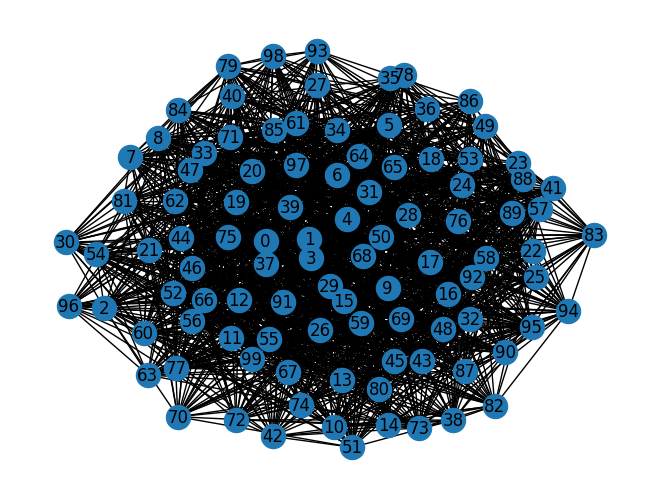

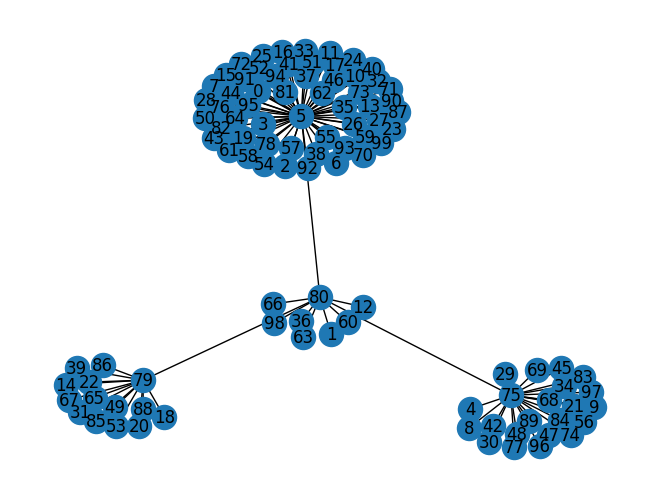

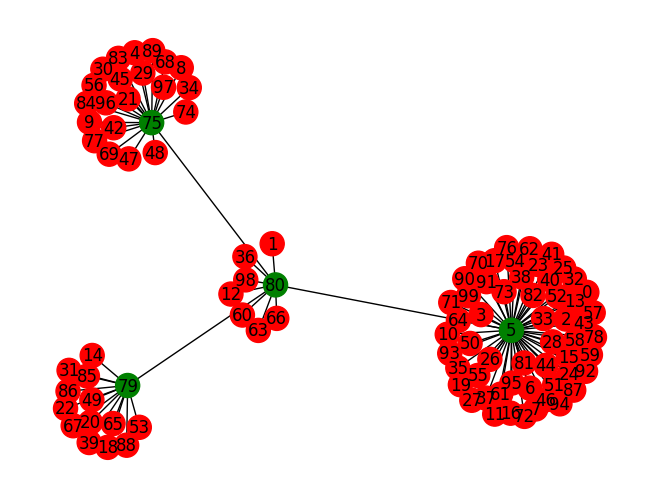

NameError: name 'err' is not defined

In [39]:
for i, (ing, out) in enumerate(zip(ing_lst, out_lst)):
    if not all([ing.has_edge(u, v) for u, v in out.edges()]):
        print("ERROR HERE ON GRAPH", i)
        print(g_out.edges(), g_out.nodes())
        visualize_graph(ing)
        visualize_graph(out)
        visualize_sol(ing, out)
        err

In [43]:
# ing_lst[25].edges()
out_lst[25].edges()

EdgeView([(0, 5), (1, 80), (2, 5), (3, 5), (4, 75), (5, 80), (5, 6), (5, 7), (5, 10), (5, 11), (5, 13), (5, 15), (5, 16), (5, 17), (5, 19), (5, 23), (5, 24), (5, 25), (5, 26), (5, 27), (5, 28), (5, 32), (5, 33), (5, 35), (5, 37), (5, 38), (5, 40), (5, 41), (5, 43), (5, 44), (5, 46), (5, 50), (5, 51), (5, 52), (5, 54), (5, 55), (5, 57), (5, 58), (5, 59), (5, 61), (5, 62), (5, 64), (5, 70), (5, 71), (5, 72), (5, 73), (5, 76), (5, 78), (5, 81), (5, 82), (5, 87), (5, 90), (5, 91), (5, 92), (5, 93), (5, 94), (5, 95), (5, 99), (8, 75), (9, 75), (12, 80), (14, 79), (18, 79), (20, 79), (21, 75), (22, 79), (29, 75), (30, 75), (31, 79), (34, 75), (36, 80), (39, 79), (42, 75), (45, 75), (47, 75), (48, 75), (49, 79), (53, 79), (56, 75), (60, 80), (63, 80), (65, 79), (66, 80), (67, 79), (68, 75), (69, 75), (74, 75), (75, 80), (75, 77), (75, 83), (75, 84), (75, 89), (75, 96), (75, 97), (79, 80), (79, 85), (79, 86), (79, 88), (80, 98)])